In [5]:
"""
Use this to quantify thread angle, spacing, etc
"""
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats


In [6]:
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (15, 10)
directory = r'C:\Users\Administrator\Desktop\thread_geometry\csv_data'


In [13]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)


def make_lin_reg(plt, df, x_min, x_max, y_min, y_max, title):
    """https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html"""
    df_window = df.loc[df['x'] > x_min]
    df_window = df_window.loc[df_window['x'] < x_max]
    df_window = df_window.loc[df_window['y'] > y_min] 
    df_window = df_window.loc[df_window['y'] < y_max] 
    
    m, b, r_value, p_value, std_err = scipy.stats.linregress(df_window['x'], df_window['y'])

    fig, ax = plt.subplots()
    ax.scatter(df_window['x'], df_window['y'])
    ax.plot(df_window['x'], m*df_window['x'] + b)
    #ax.annotate('r^2: ' + str("{:.2f}".format(r_value**2)), xy=(1950,19500))
    #ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,18500))

    fig.show()

    print(r_value**2)
    
# windowed view

def window_view(plt, df, x_min, x_max, y_min, y_max, title):
    """use limits on dataframe, make scatter plot of results."""
    
    df_window = df.loc[df['x'] > x_min]
    df_window = df_window.loc[df_window['x'] < x_max]
    df_window = df_window.loc[df_window['y'] > y_min] 
    df_window = df_window.loc[df_window['y'] < y_max] 

    ax = df_window.plot.scatter(x='y', y='x', c='DarkBlue')
    ax.set_title(title)
    plt.show()
    
def line_fitting(plt, df, x_min, x_max, y_min, y_max, title):
    """vis window, fit some lines."""
    
    fig, ax = plt.subplots()
    
    df_window = df.loc[df['x'] > x_min]
    df_window = df_window.loc[df_window['x'] < x_max]
    df_window = df_window.loc[df_window['y'] > y_min] 
    df_window = df_window.loc[df_window['y'] < y_max] 

    ax.scatter(df_window['y'], df_window['x'], c='DarkBlue')
    ax.set_title('line fitting')

    # add a line
    
    m = 105
    b = 1800
    width = 105
    
    angle = (0.5)*np.arctan(m)*(180/np.pi)
    
    n = 11
    
    for i in range(0,n):
        
        check = df_window['y']
        ax.plot(check, (1/m)*check + b + width*i - (2*width), c='red')
        ax.plot(check, (0)*check + b + width*i - (2*width), c='lime', linestyle='-.')

    plt.show()
    print('m: ', m)
    print('b: ', b)
    print('thread spacing (pixels): ', width)
    print('number of threads: ', n)
    print('angle (degs): ', angle)
    
def sigmoid_fit(plt, df, x_min, x_max, y_min, y_max, title):
    """vis window, fit some sigmoids."""
    
    fig, ax = plt.subplots()
    
    df_window = df.loc[df['x'] > x_min]
    df_window = df_window.loc[df_window['x'] < x_max]
    df_window = df_window.loc[df_window['y'] > y_min] 
    df_window = df_window.loc[df_window['y'] < y_max] 

    ax.scatter(df_window['y'], df_window['x'], c='DarkBlue')
    ax.set_title('sigmoid fitting')

    n = 1
    width = 105
    
    for i in range(0,n):
        
        x = df_window['y']
        y = df_window['x']

        #L = 2500
        #x0 = 4000
        #k = 4000
        #b = 500
        
        #y = sigmoid(x, L, x0, k, b)
        
        ax.plot(x, y, c='red')
        #ax.plot(check, (0)*check + b + width*i - (2*width), c='lime', linestyle='-.')

    plt.show()
    #print('m: ', m)
    #print('b: ', b)
    #print('thread spacing (pixels): ', width)
    #print('number of threads: ', n)
    #print('angle (degs): ', angle)

file path: C:\Users\Administrator\Desktop\thread_geometry\csv_data\thread_fast_threaddata.csv
   index     x          y
0      0    92   8.631579
1      1   760   5.539474
2      2   894   6.197368
3      3   977   6.421053
4      4  1115   6.894737
5      5  1201   6.460526
6      6  1323   7.065789
7      7  1380  37.131579
8      8  1419  42.644737
9      9  1570   7.013158


<Figure size 1080x720 with 0 Axes>

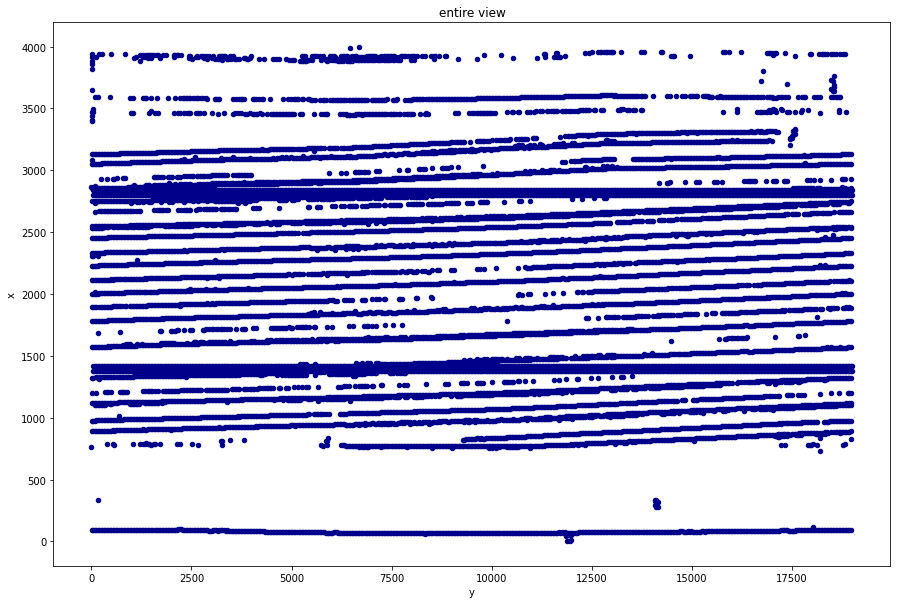

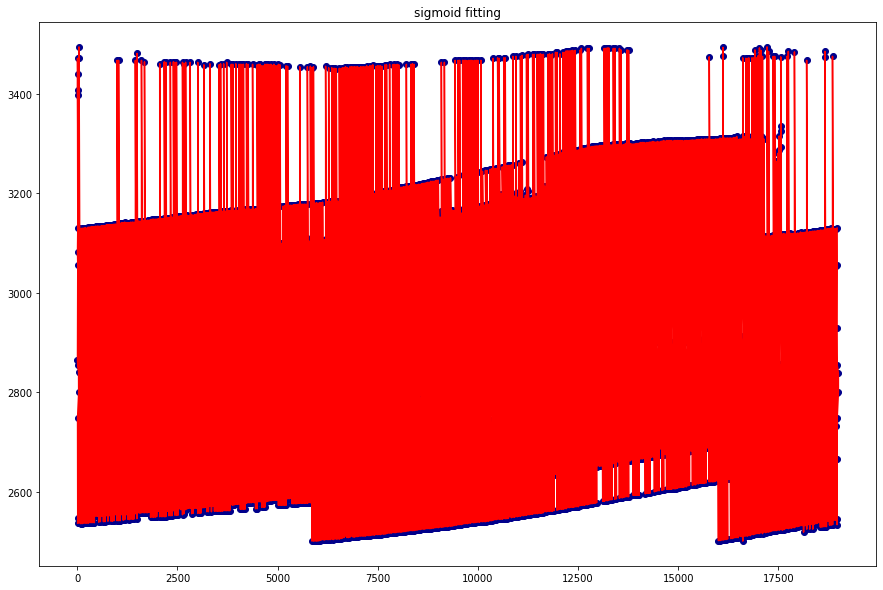

file path: C:\Users\Administrator\Desktop\thread_geometry\csv_data\thread_slow_threaddata.csv
   index     x          y
0      0   167   9.407895
1      1   682   8.855263
2      2   738   6.171053
3      3   785   7.513158
4      4  1033   7.000000
5      5  1156   5.828947
6      6  1168   7.092105
7      7  1380  37.118421
8      8  1419  43.986842
9      9  1446   6.144737


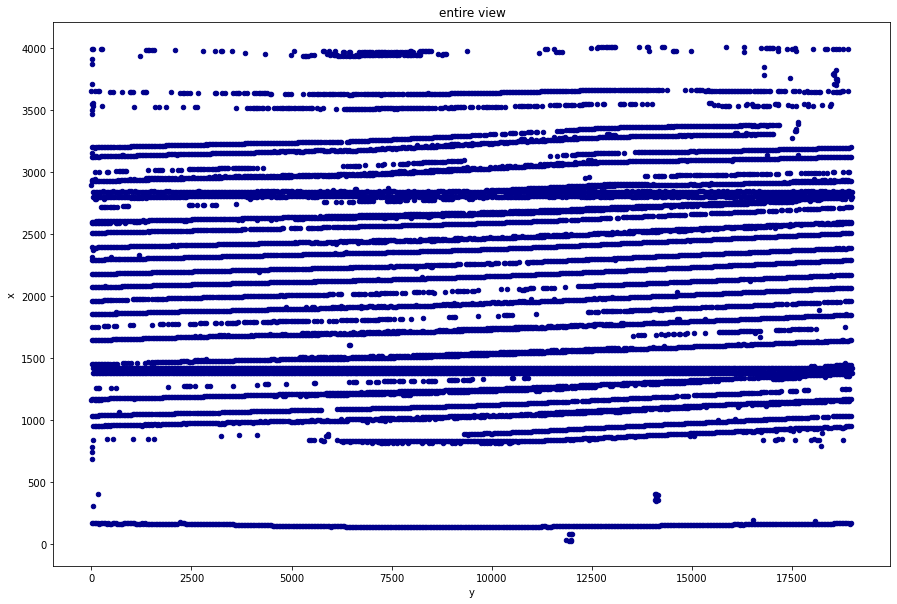

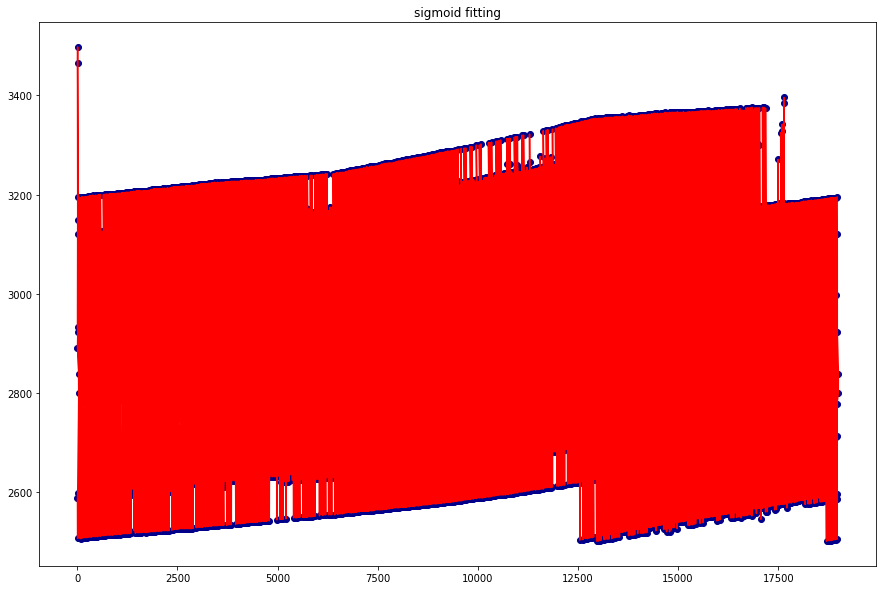

In [14]:
plt.figure()

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        print('file path:', file_path)
        cols = ['index', 'x', 'y']
        df = pd.read_csv(file_path, names=cols, skiprows=1)
        print(df.head(10))
                
        #fig, ax = plt.subplots()
        
        ax = df.plot.scatter(x='y', y='x', c='DarkBlue')
        ax.set_title('entire view')
        plt.show()
        
        x_min = 0
        x_max = 4057
        y_min = 0
        y_max = 19177
        
        # sigmoid portion
        
        sigmoid_fit(plt, df, 2500, 3500, y_min, y_max, 'sigmoid section')

   index     x          y
0      0    92   8.631579
1      1   760   5.539474
2      2   894   6.197368
3      3   977   6.421053
4      4  1115   6.894737
5      5  1201   6.460526
6      6  1323   7.065789
7      7  1380  37.131579
8      8  1419  42.644737
9      9  1570   7.013158


<Figure size 1080x720 with 0 Axes>

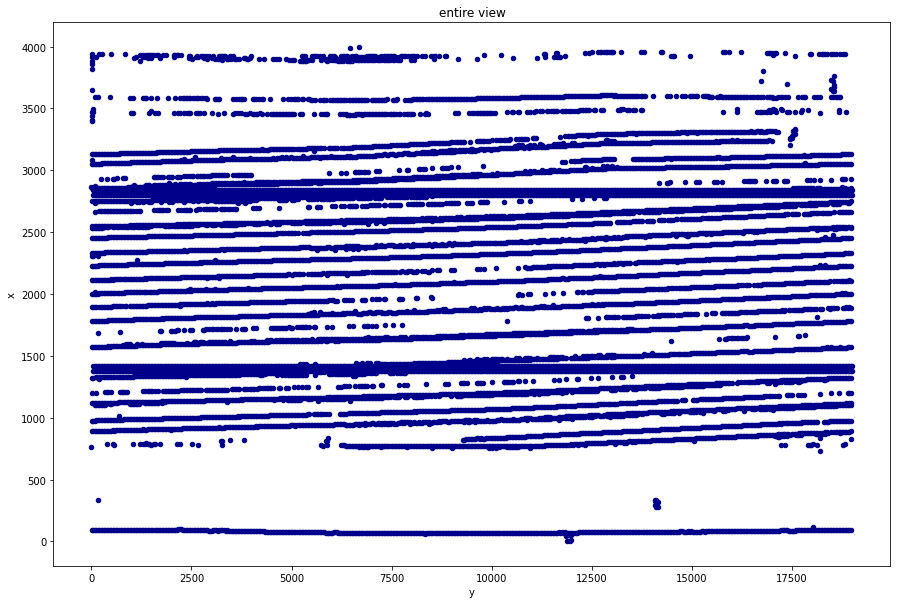

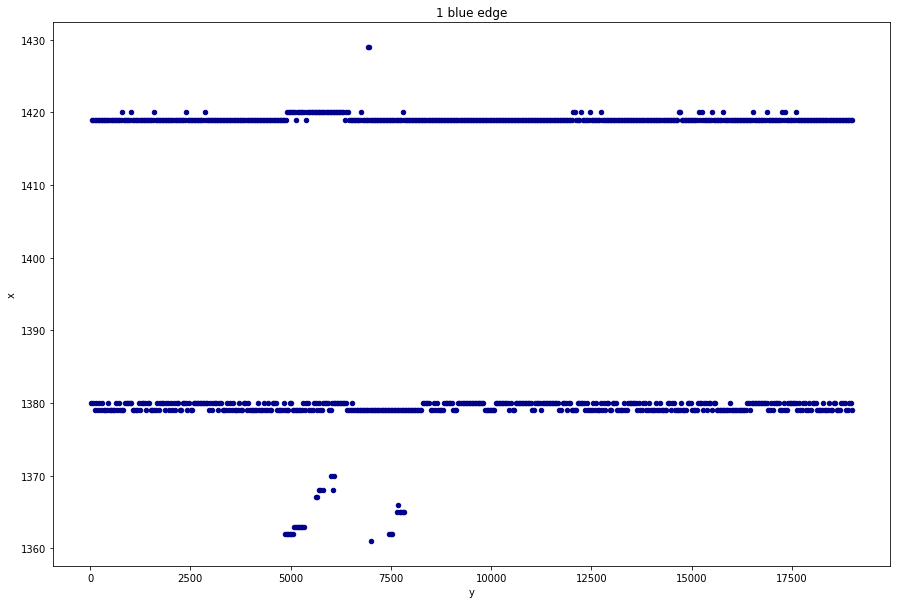

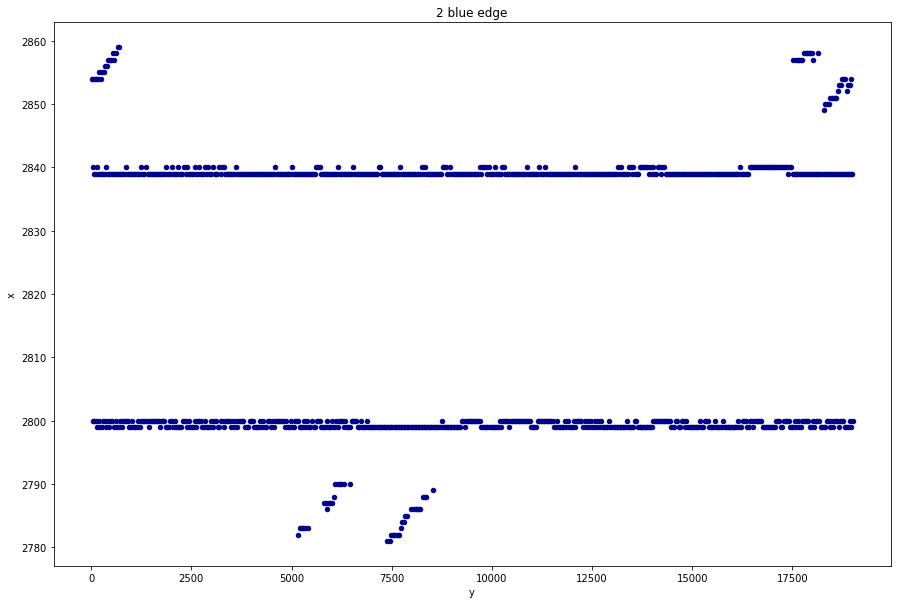

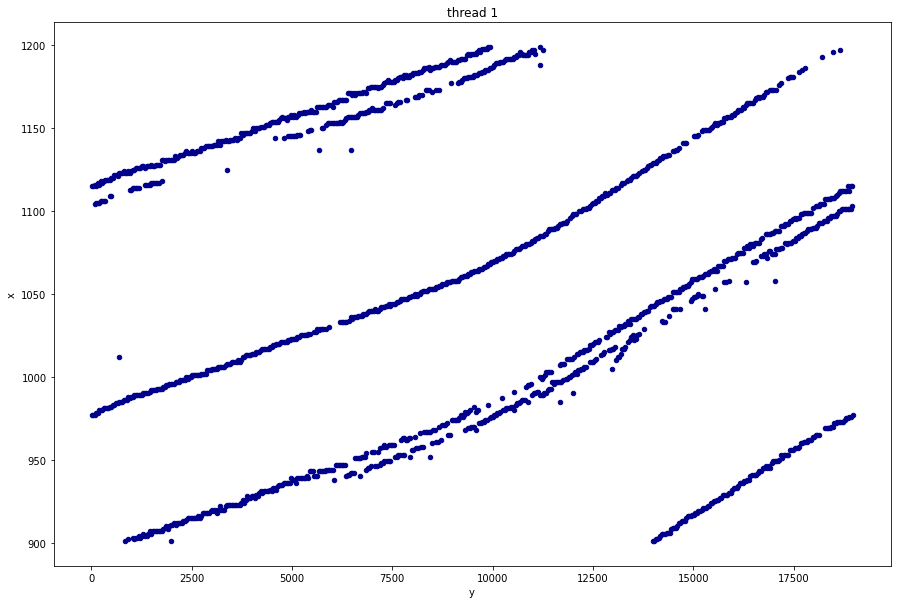

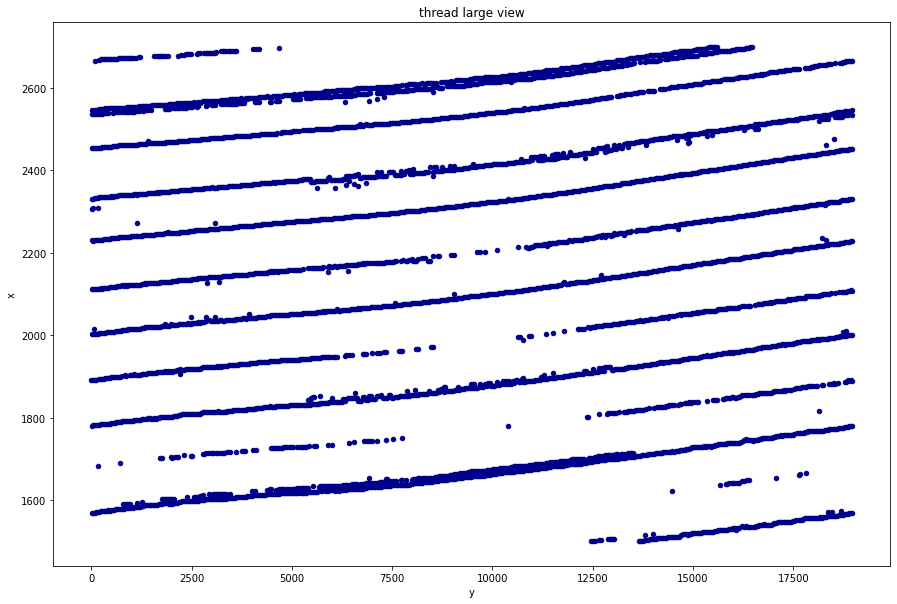

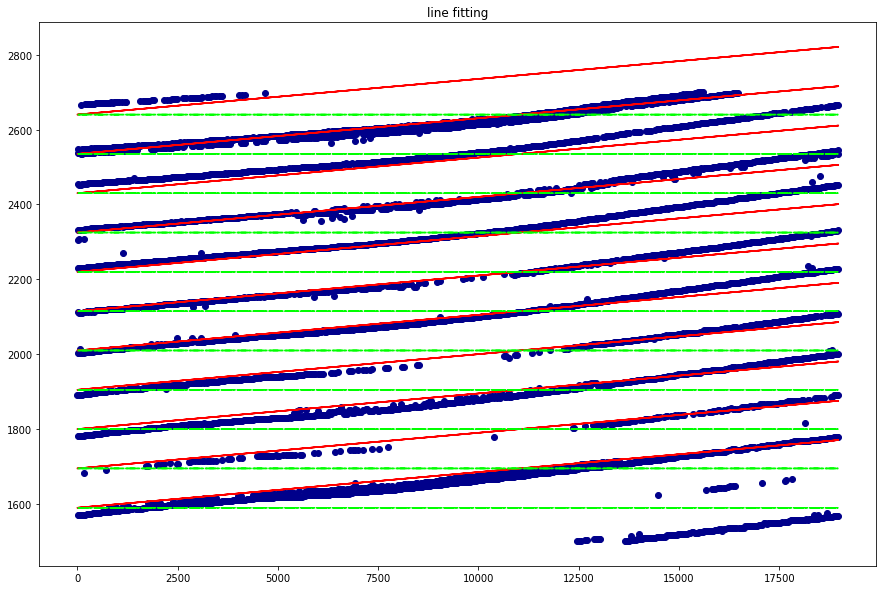

m:  105
b:  1800
thread spacing (pixels):  105
number of threads:  11
angle (degs):  44.727171203292144


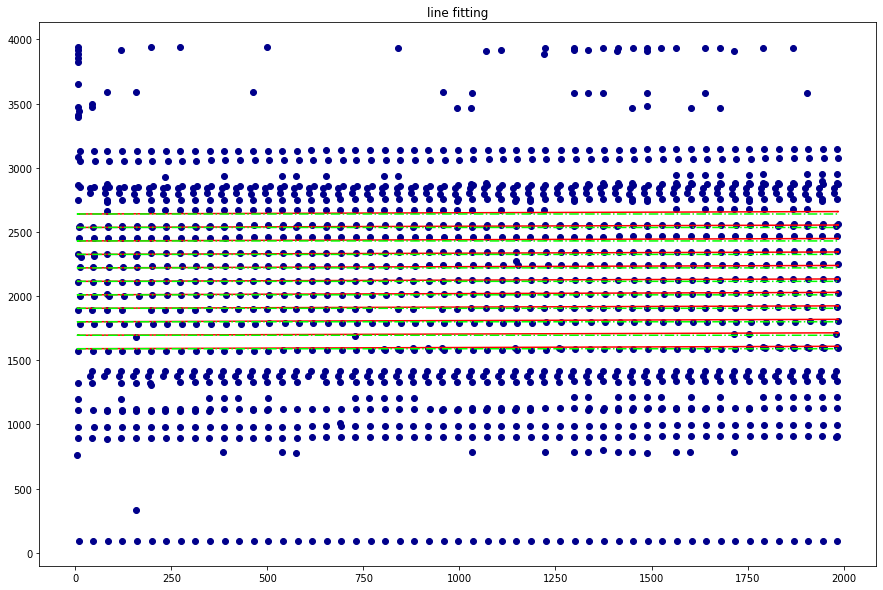

m:  105
b:  1800
thread spacing (pixels):  105
number of threads:  11
angle (degs):  44.727171203292144


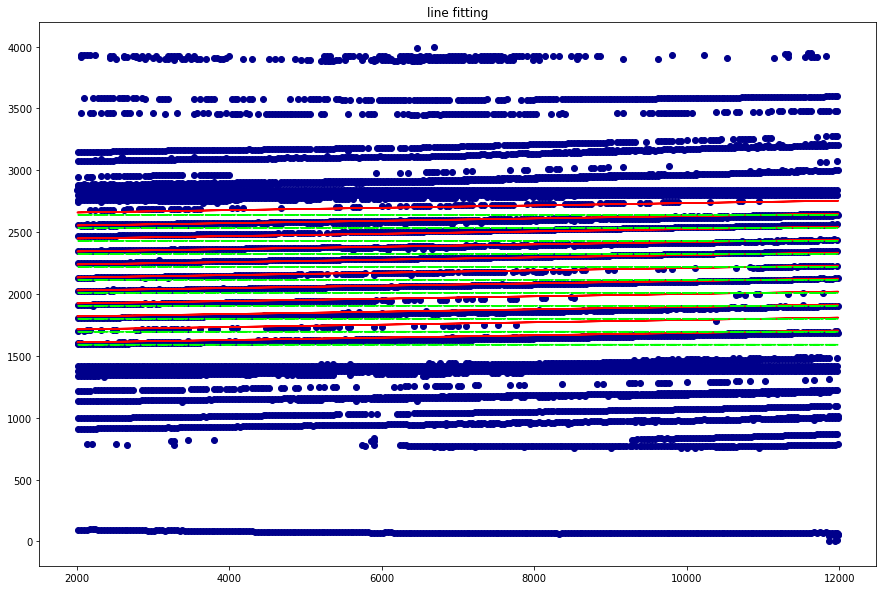

m:  105
b:  1800
thread spacing (pixels):  105
number of threads:  11
angle (degs):  44.727171203292144


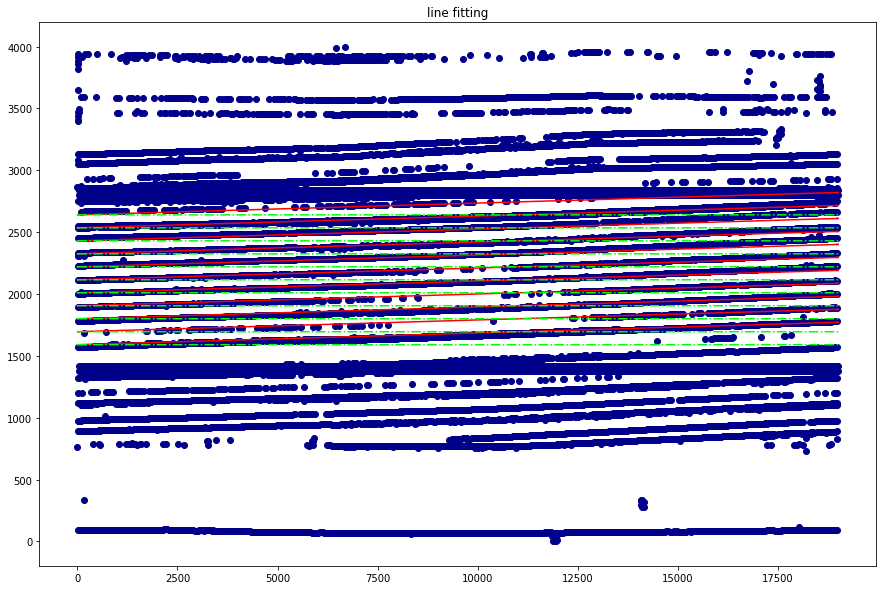

m:  105
b:  1800
thread spacing (pixels):  105
number of threads:  11
angle (degs):  44.727171203292144


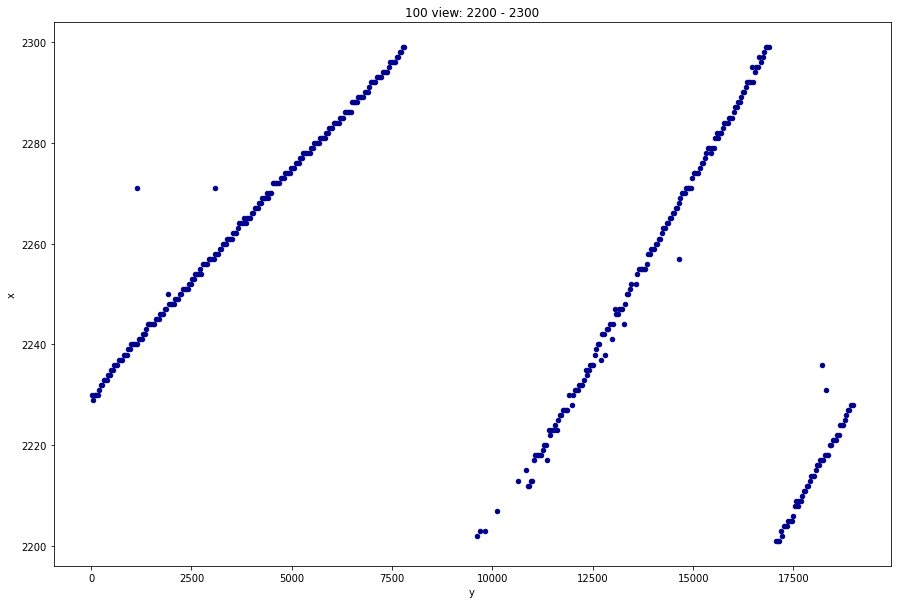

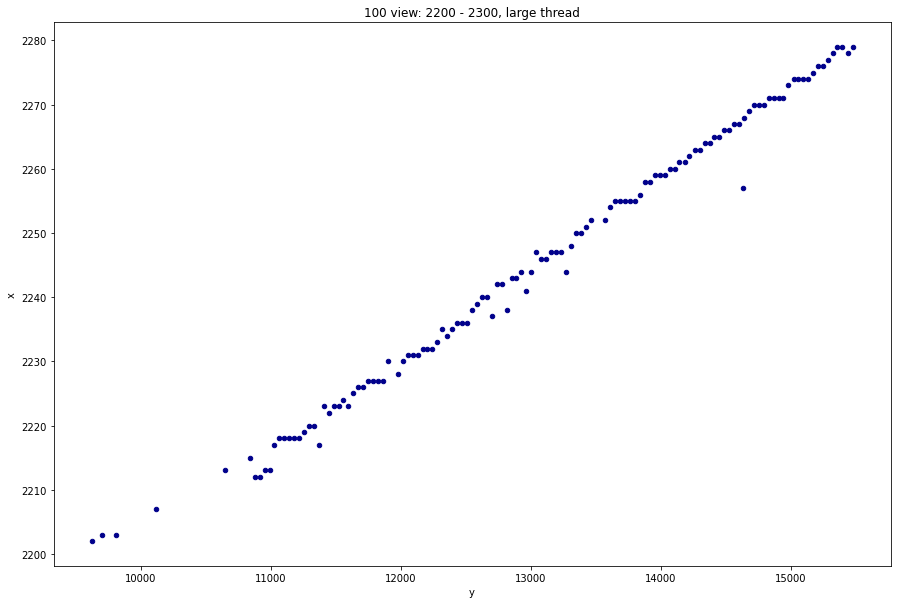

0.9934645096022977
   index     x          y
0      0   167   9.407895
1      1   682   8.855263
2      2   738   6.171053
3      3   785   7.513158
4      4  1033   7.000000
5      5  1156   5.828947
6      6  1168   7.092105
7      7  1380  37.118421
8      8  1419  43.986842
9      9  1446   6.144737


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_1504/1880753606.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


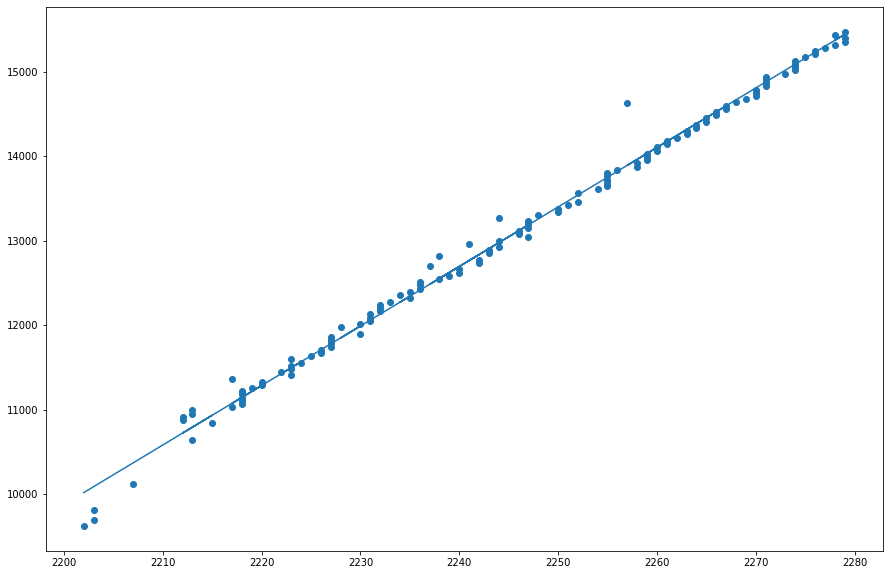

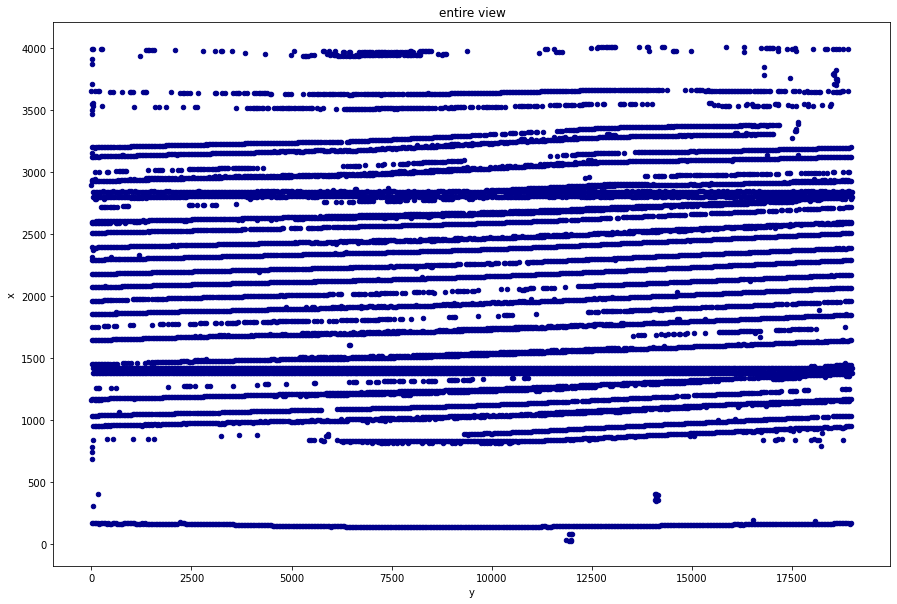

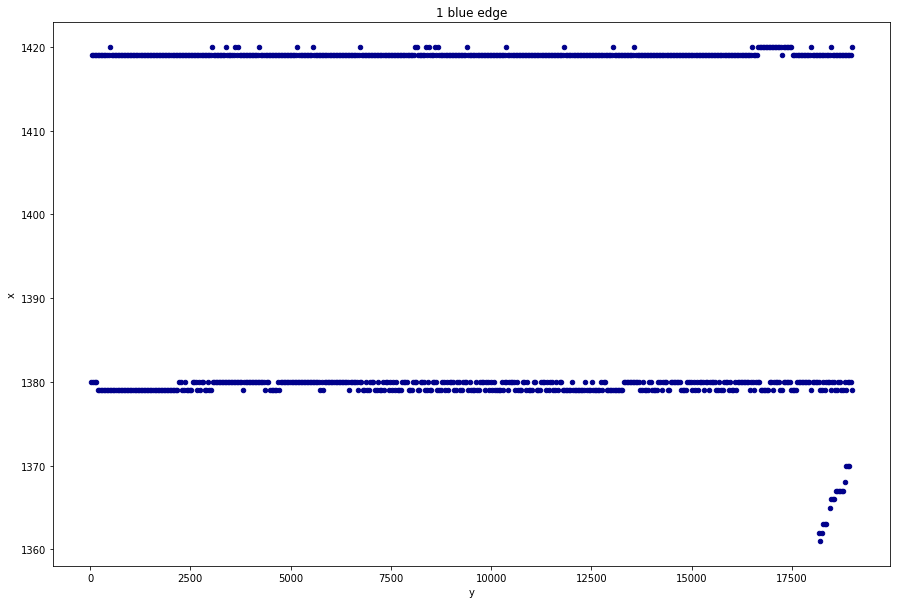

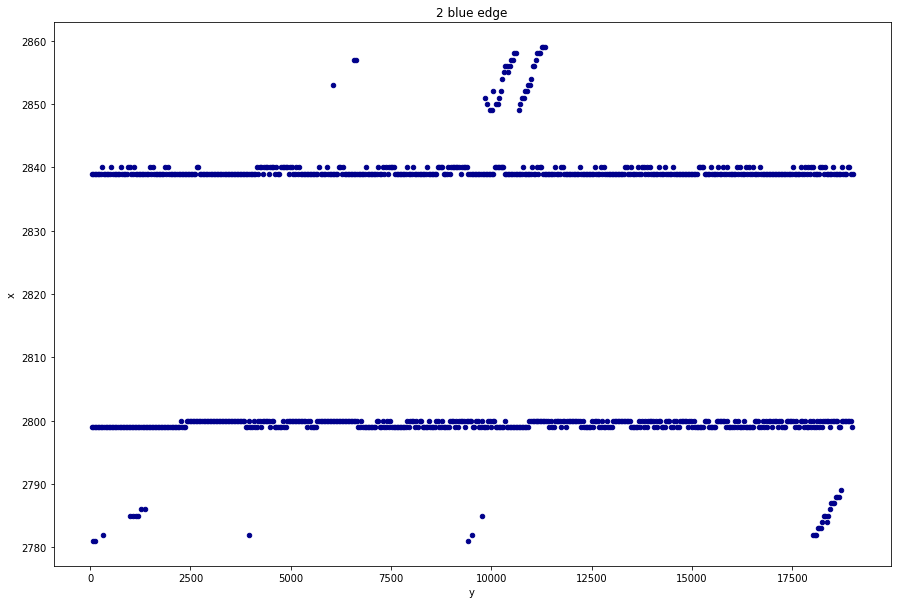

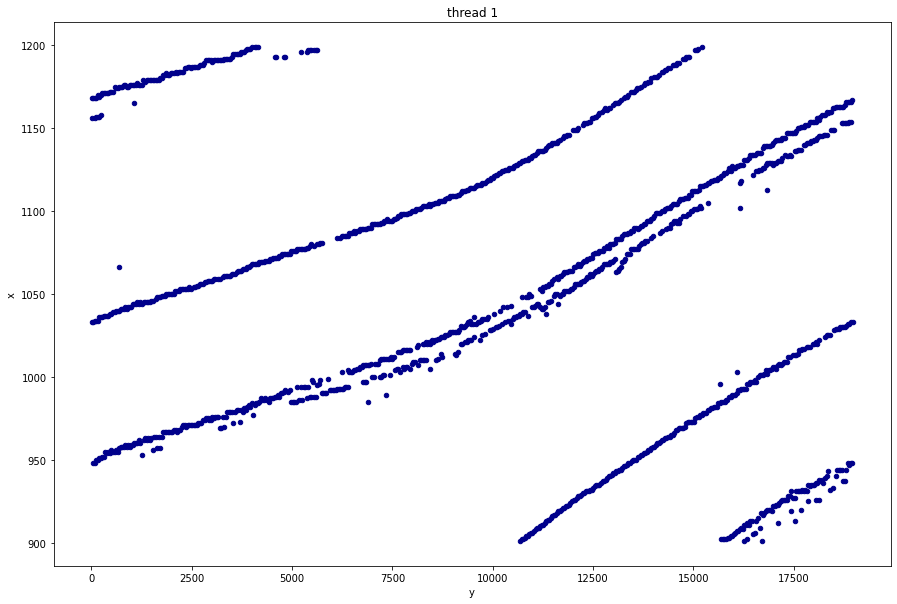

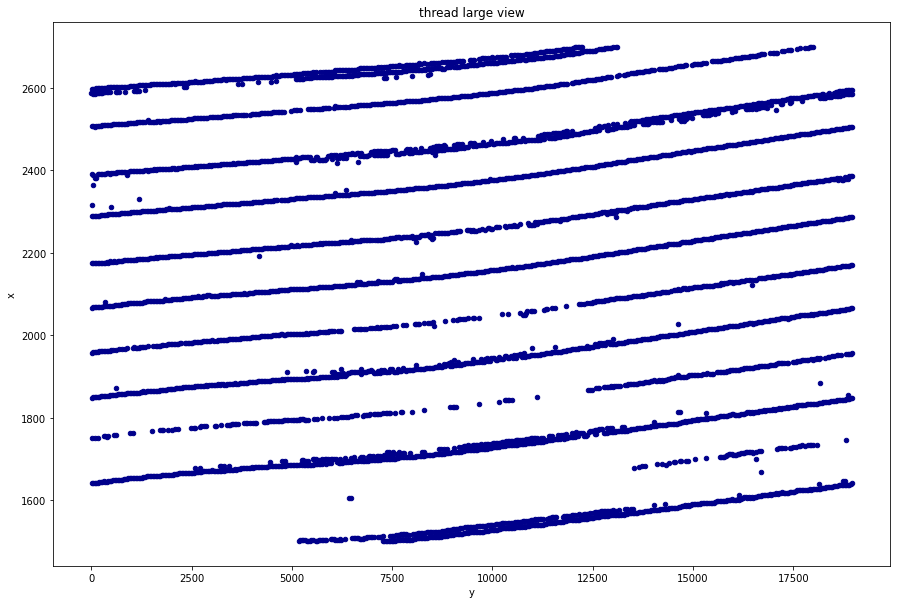

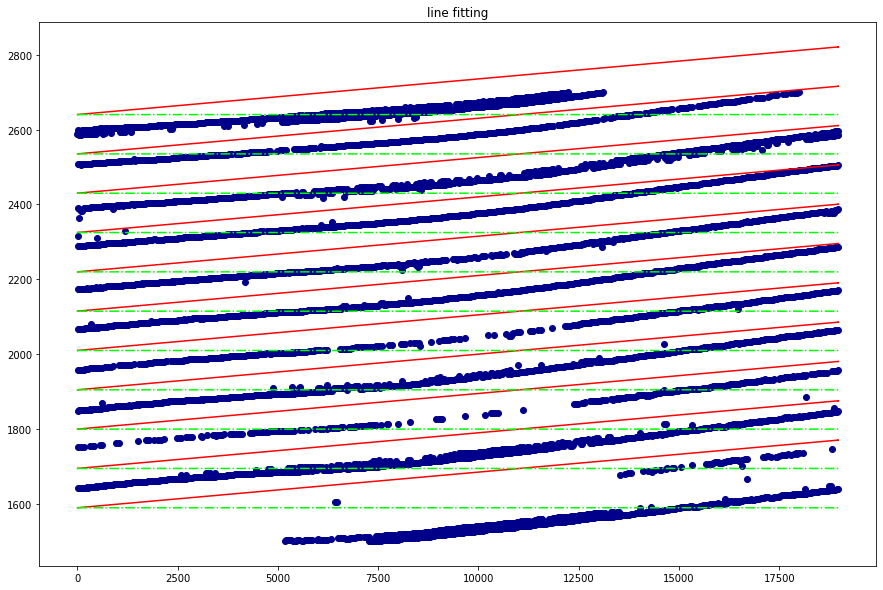

m:  105
b:  1800
thread spacing (pixels):  105
number of threads:  11
angle (degs):  44.727171203292144


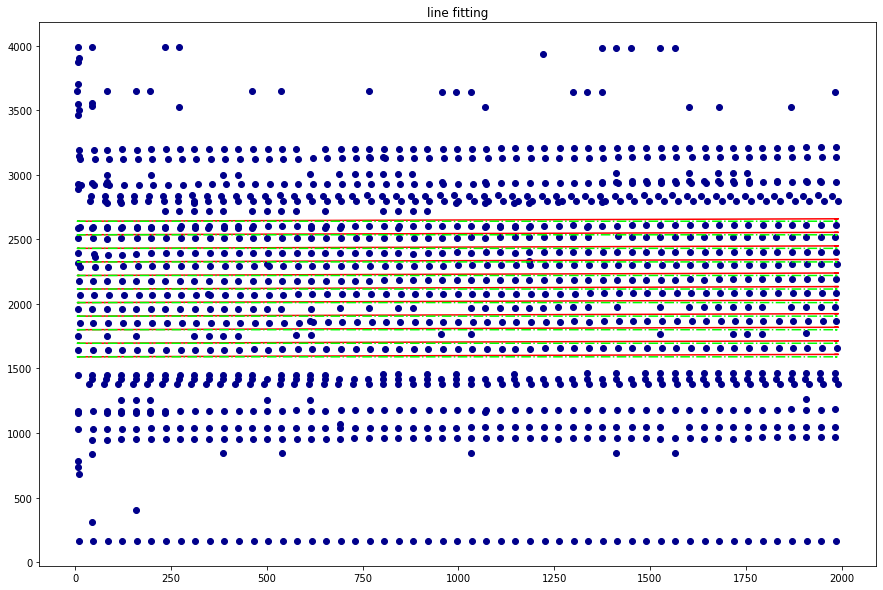

m:  105
b:  1800
thread spacing (pixels):  105
number of threads:  11
angle (degs):  44.727171203292144


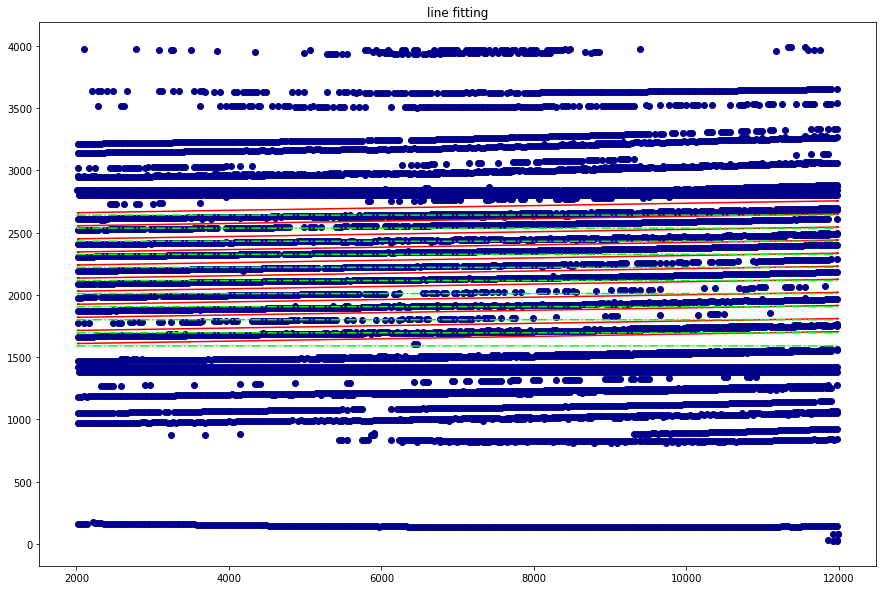

m:  105
b:  1800
thread spacing (pixels):  105
number of threads:  11
angle (degs):  44.727171203292144


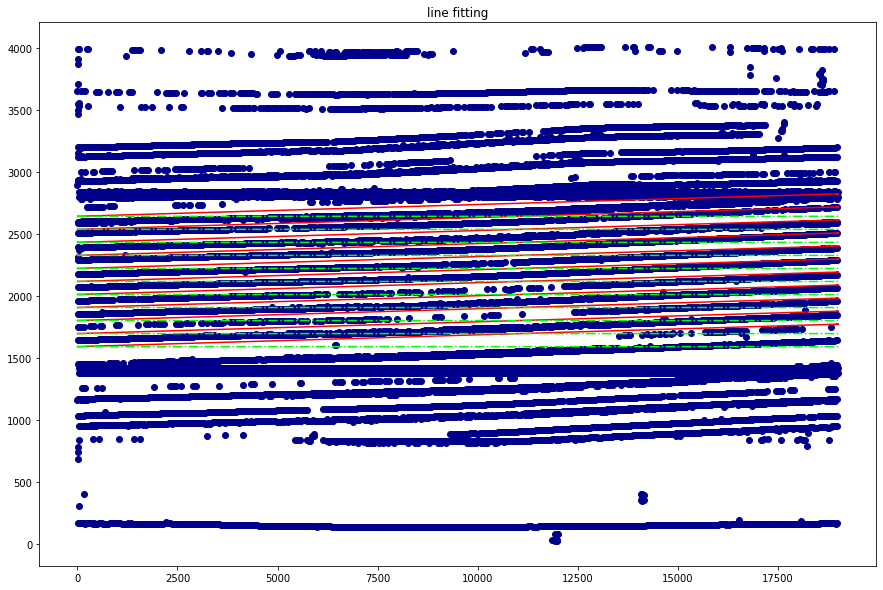

m:  105
b:  1800
thread spacing (pixels):  105
number of threads:  11
angle (degs):  44.727171203292144


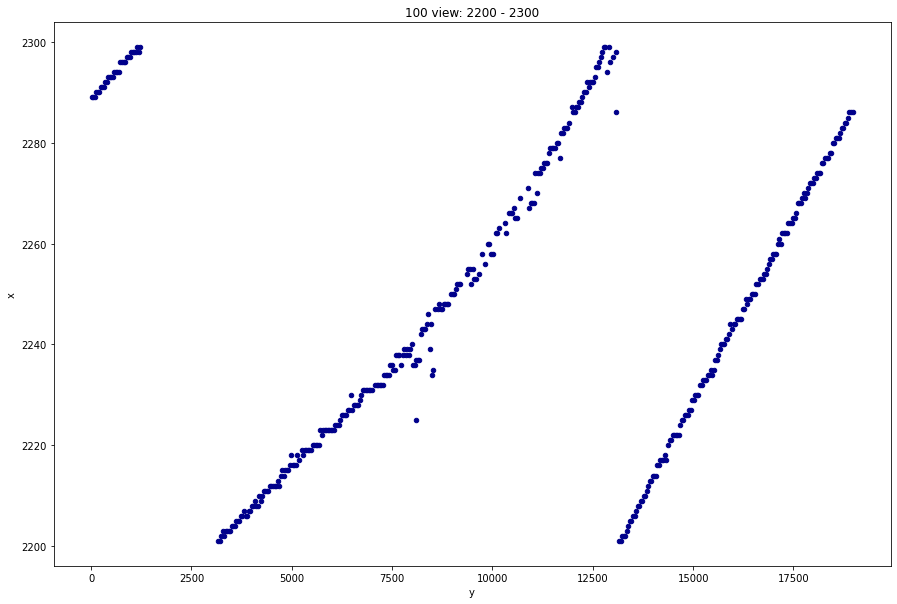

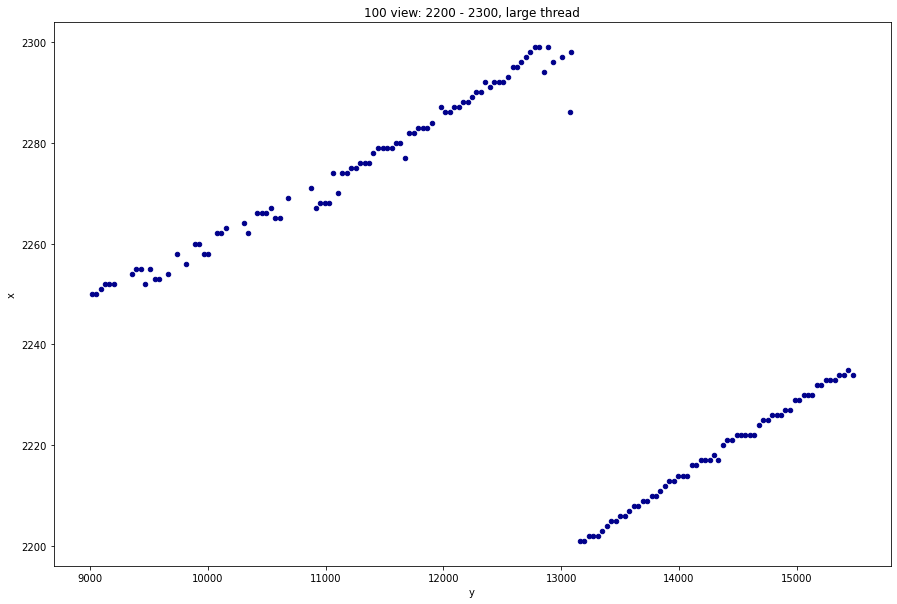

0.2726879646459811


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_1504/1880753606.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


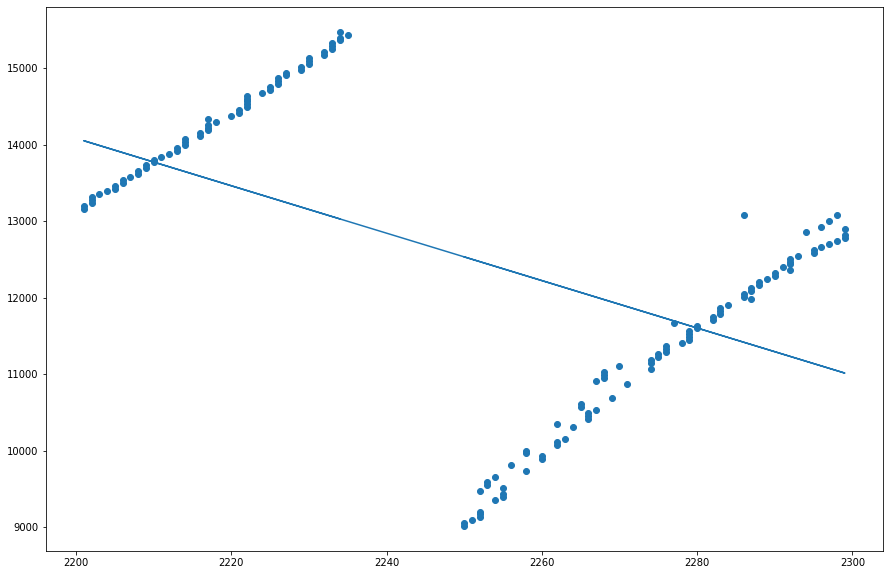

In [15]:

plt.figure()

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        
        cols = ['index', 'x', 'y']
        df = pd.read_csv(file_path, names=cols, skiprows=1)
        print(df.head(10))
                
        #fig, ax = plt.subplots()
        
        ax = df.plot.scatter(x='y', y='x', c='DarkBlue')
        ax.set_title('entire view')
        plt.show()
        
        x_min = 0
        x_max = 4057
        y_min = 0
        y_max = 19177
        
        # 1370 - 1420 --> this is where first blue edge lives. calc slope of this data
        
        window_view(plt, df, 1360, 1430, y_min, y_max, '1 blue edge')
        
        # 2790 - 2850 --> this is where second blue edge lives. calc slope of this data
        
        window_view(plt, df, 2780, 2860, y_min, y_max, '2 blue edge')

        # try another set
        
        window_view(plt, df, 900, 1200, y_min, y_max, 'thread 1')
        
        # large view
        
        window_view(plt, df, 1500, 2700, y_min, y_max, 'thread large view')
        
        # add lines to analysis
        
        line_fitting(plt, df, 1500, 2700, y_min, y_max, 'thread large view')
        
        # add lines to analysis
        
        line_fitting(plt, df, x_min, x_max, 0, 2000, 'thread large view, 0 - 2000')
        
        # add lines to analysis
        
        line_fitting(plt, df, x_min, x_max, 2000, 12000, 'thread large view 2000 - 4000')
        
        line_fitting(plt, df, x_min, x_max, y_min, y_max, 'fit for mid')

        # 100 pixel view
        
        window_view(plt, df, 2200, 2300, y_min, y_max, '100 view: 2200 - 2300')
        
        # zoom in on single thread

        window_view(plt, df, 2200, 2300, 9000, 15500, '100 view: 2200 - 2300, large thread')
        
                
        # make lin reg of single pipe thread view
        
        make_lin_reg(plt, df, 2200, 2300, 9000, 15500, 'lin reg')


        
        
